In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pca import pca
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import io

# **Step 2**


# **Principal components**

● Advantages:

Dimensionality Reduction: PCA reduces the number of features, simplifying the dataset.

Noise Reduction: It helps in filtering out noise and focusing on the most important features.

Visual Representation: Data can be visualized in a reduced-dimensional space, aiding interpretation.

● Basics:

Principal components are new variables which are the linear combinations of the original variables. It’s also uncorrelated and most of the information is compressed into the first components.

Principal components are orthogonal.

● Computation:

In the Jupyter Notebook, we show how the load_digits dataset look like by presenting one of the digits images, normalizing the data, plot the correlation matrix and extract features by running PCA() function in two methods: one is number of components can explain 90% of variance (Reduced number of components is 30) and the other is the number of components equal to 40. We select 40 as the optimal number of components by running GridSearchCV pipeline.


<Figure size 640x480 with 0 Axes>

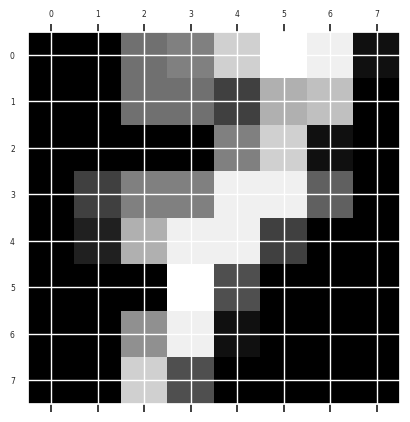

In [ ]:
import pylab as pl
pl.gray()
pl.matshow(digits.images[7]) # for example, the image below show number seven
pl.show()

In [ ]:
# Load dataset
X, y = load_digits(return_X_y=True)

print("Original Dataset: ", X.shape)

# normaliztion
scaler = StandardScaler()

X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.5, random_state=0)

print("Training Dataset: ",x_train.shape)

Original Dataset:  (1797, 64)
Training Dataset:  (898, 64)


<Axes: >

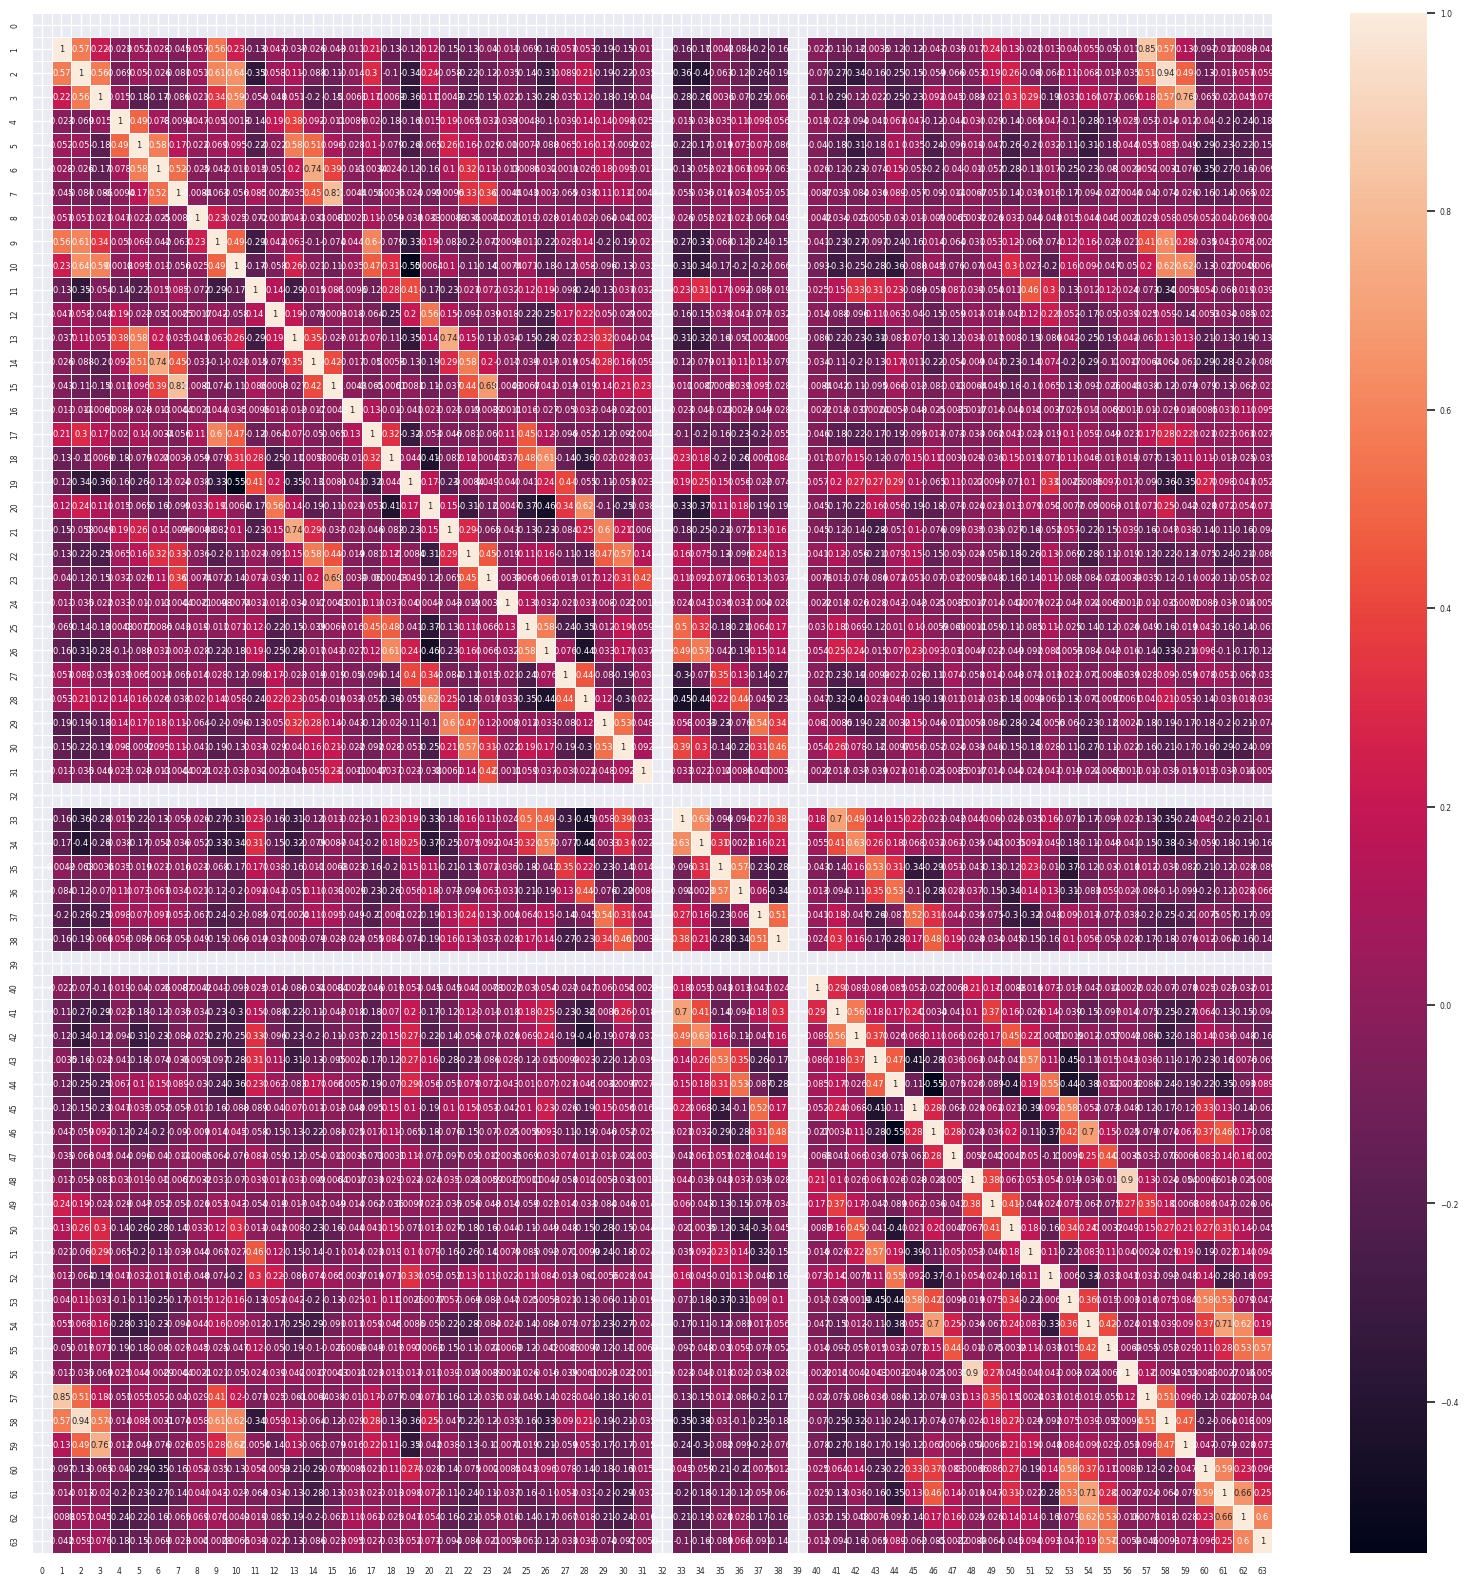

In [ ]:
# correlation matrix before PCA: we can observe highly correlated between variables
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.5)

sns.heatmap(pd.DataFrame(x_train).corr(), annot = True, linewidths=.5, ax=ax)

In [ ]:
# Conducting Principal Component Analysis
# Create a PCA that will retain 90% of the variance
pca = PCA(n_components=0.90, whiten=True)

# Conducting PCA
X_pca = pca.fit_transform(x_train)
print(); print(X_pca)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

# Creating a PCA with 40 components
pca = PCA(n_components=40, whiten=True)

# Conducting PCA
X_pca = pca.fit_transform(x_train)
print(); print(X_pca)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])



[[ 0.39428213 -0.11794026 -2.00824473 ... -0.46771563  0.01120593
  -0.9454381 ]
 [ 1.42002701  0.80981682 -0.04639556 ...  0.57220761 -2.14955656
   1.49799066]
 [-0.2728264  -0.27600715  1.52022356 ... -1.84371362  0.15094891
   0.05628399]
 ...
 [ 0.00317146  0.80183117 -1.10927771 ...  0.79341885  0.2859059
  -0.62553008]
 [ 0.36409986  1.32918771 -0.35147793 ... -1.72418078  1.27698293
  -1.12362758]
 [-0.66063429 -0.22658192 -0.10770459 ... -0.15098981 -0.33374598
  -0.04867542]]
Original number of features: 64
Reduced number of features: 30

[[ 0.39428212 -0.11794024 -2.00824476 ... -1.16632891 -0.97087483
   0.63638781]
 [ 1.42002702  0.80981681 -0.04639557 ... -0.24301572  0.54887616
   1.23390758]
 [-0.27282639 -0.27600716  1.52022361 ... -0.47187993 -0.33721025
   0.98099521]
 ...
 [ 0.00317146  0.80183119 -1.10927773 ... -0.5238322   0.28142619
  -0.38201506]
 [ 0.36409987  1.32918768 -0.35147786 ... -1.15530067  0.44643687
  -0.08036502]
 [-0.66063428 -0.22658191 -0.10770

In [ ]:
classifier = svm.SVC()
# Combine PCA and SVC to a pipeline
pipe = Pipeline(steps=[('pca', pca), ('svm', classifier)])

n_components = [10, 20, 30, 40, 50, 60, 64]

params_grid = {
    'svm__C': [1, 10, 100, 1000],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.0001],
    'pca__n_components': n_components,
}

estimator = GridSearchCV(pipe, params_grid)
estimator.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % estimator.best_score_)
print(estimator.best_params_)

Best parameter (CV score=0.974):
{'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


In [ ]:
estimator

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=40, whiten=True)),
                                       ('svm', SVC())]),
             param_grid={'pca__n_components': [20, 40, 64],
                         'svm__C': [1, 10, 100, 1000],
                         'svm__gamma': [0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf']})

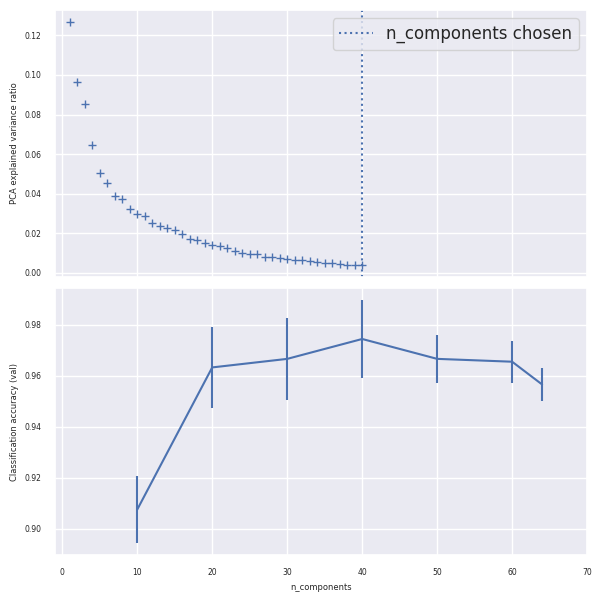

In [ ]:
# Plot the PCA
pca.fit(x_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    estimator.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(estimator.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

● Disadvantages:

  - Linearity Assumption: PCA assumes a linear relationship between variables, which might not always hold.

  - Information Loss: While reducing dimensions, some information is inevitably lost.

  - Interpretability: Principal components might not have a clear, interpretable meaning in the original feature space. In other words, we won’t be able to interpret which variables are the top predictors. To know the top predictors, we will need to build the model without PCA.

● Equations:

    Step 1: standardization: transform all the variables to the same scale

    z = (value - mean)/(standard deviation)

    Step 2: compute covariance matrix

    Cov(x,x) = Var(x)

    Cov(x,y) = Cov(y,x)

    Step 3: find the eigenvalues and eigenvectors

    Step 4: feature vector: compute the eigenvectors and sort them by their eigenvalues in descending order. In this way, we can find the principal components in order of significance. By deciding whether to keep all the components or discard those of low eigenvalues, we can form the feature vectors with the remaining components.

● Features:

  - Missing Values: PCA handles missing values well, making it suitable for datasets with incomplete information.
  - Multicollinearity: It is effective in dealing with multicollinearity, as principal components are orthogonal.

● Guide:

- Inputs: High-dimensional dataset
- Outputs: Lower-dimensional representation of the data (principal components)

● Hyperparameters:

- Number of Components: The number of principal components to retain, which influences the amount of variance preserved.



● Illustration: Visualization & References

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.95      0.98      0.96        90
           2       0.96      1.00      0.98        92
           3       0.96      0.98      0.97        93
           4       0.95      1.00      0.97        76
           5       0.96      0.96      0.96       108
           6       0.99      0.98      0.98        89
           7       0.97      0.99      0.98        78
           8       0.98      0.86      0.91        92
           9       0.96      0.93      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  88   0   0   1   0   0   0   1   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   2  91   0   0   0  

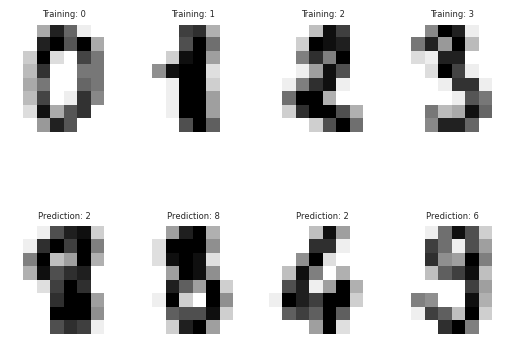

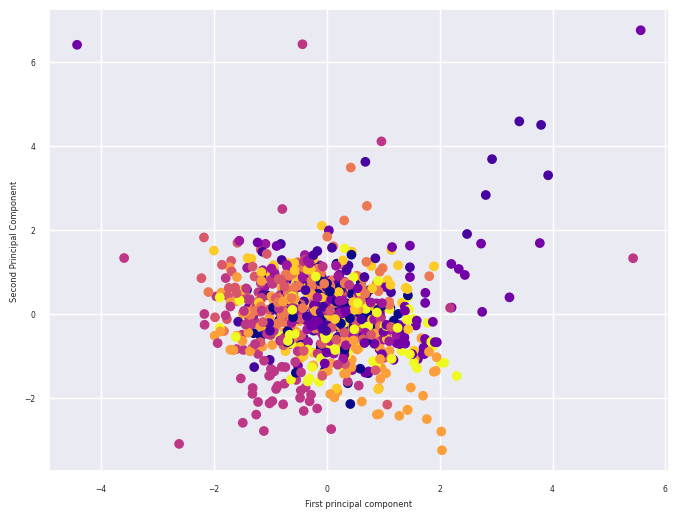

In [ ]:
# The digits dataset
digits = datasets.load_digits()
X, y = load_digits(return_X_y=True)

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will show the four images for the training set and another four images for prediction
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
# We get the optimal number from GridSearch:
 # {'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
pca = PCA(n_components=40)
scaler = StandardScaler()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


classifier = SVC(C= 100, gamma=0.001, kernel = 'rbf')


# We learn the digits on the training set
#classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])
classifier.fit(x_train, y_train)

# Now predict the value of the digit on test set:
#expected = digits.target[int(n_samples / 2):]
#predicted = classifier.predict(data[int(n_samples / 2):])
expected = y_test
predicted = classifier.predict(x_test)#

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.show()

References

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Logistic regression: https://scikit-learn.sourceforge.net/dev/auto_examples/plot_digits_pipe.html

Logistic Python example: https://medium.com/@dlwilkinson/a-model-that-identifies-a-hand-written-number-using-logistic-regression-and-python-29308efd386a

Recognizing hand-written digits: https://scikit-learn.sourceforge.net/dev/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py

● Journal:

Avellaneda, Marco and Lee, Jeong-Hyun, Statistical Arbitrage in the U.S. Equities Market (July 11, 2008). Available at SSRN: https://ssrn.com/abstract=1153505 or http://dx.doi.org/10.2139/ssrn.1153505

● Keywords:

Dimensionality Reduction, Eigenvectors, Eigenvalues, Multicollinearity, Feature Extraction, Data Visualization, Machine learning, risk model, clustering, k-means, statistical risk models, covariance, correlation, variance, cluster number, risk factor, optimization, regression, mean-reversion, factor loadings, industry classification, quant, trading, dollar-neutral, alpha, signal, backtest;alpha, optimization, regression, risk factor, factor model, style factor, volatility, turnover, momentum, correlation, covariance, variance, equities, Sharpe ratio; Futures term structure, Roll yield, Convenience yield, Contango, Backwardation, Commodity trading strategy; expected returns, implied volatility, realized volatility, volatility spread; interest rate, bond, risk management, factor model; Performance, Attribution, Fixed Income, Central Bank


# **Lasso**

Boston Housing data has been removed from scikit-learn since version 1.2. and this is why I am manualy adding it because I think it is a good example for applying Lasso's feature extraction method

**LASSO**

**Advantages:**
It can do feature selection as well as regularization and thus enhance the accuracy of the prediction as well as the interpretability of the given model. Given these features this model is very useful for higher dimensional data and especially when the features are more than the observations. Thanks to its penalty function this model lowers the coefficients of the not important features to zero and thus lowers the variables count so in practice this is how a feature reduction and selection can be conducted

**Disadvantages:**
 The main problems here are that it cannot deal with multicollinearity and since it is shrinking the coefficient to zero, there is the fact that some of the data is being lost. Also Lasso is very sensitive to noisy data, outliers and missing data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.xlsx to BostonHousing (1).xlsx


In [ ]:
# creating dataframe
data = pd.read_excel(io.BytesIO(uploaded.get('BostonHousing (1).xlsx')))
data.to_csv('Boston.csv', index=False)
data = pd.read_csv('Boston.csv')
df = pd.DataFrame(data)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:

# looking at null values

df.isna().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# creating features and label variable

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.741404,CRIM
1,2.321843,ZN
2,4.049690,INDUS
3,1.069182,CHAS
4,4.495772,NOX
5,2.107004,RM
6,3.173844,AGE
7,3.827427,DIS
8,6.986683,RAD
9,8.651382,TAX


VIF values of TAX and RAD are more than 5 so this suggests multicolinearity and we have to drop them but let's try LASSO to see how it would do feature selection.

In [ ]:
# splitting data into training asnd test set



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

Let's do Lasso regression witouth hyperparamether optimization and then do the optimization to see what are the differences

In [ ]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [ ]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.03434203675429976

In [ ]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.03434203675429976)

[-0.62955137  0.99802139 -0.          0.83861977 -2.0823349   3.39185003
 -0.72637875 -3.00768374  1.57745795 -1.64412616 -1.84683468  0.80482367
 -2.36248729]


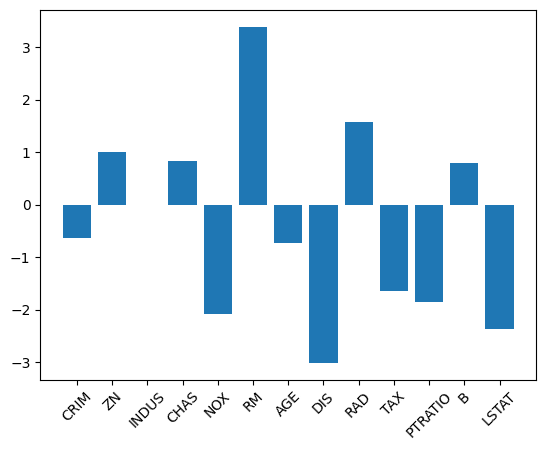

In [ ]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

plt.bar(df.columns.drop('MEDV'), lasso_coef)
plt.xticks(rotation=45)
plt.show()

Thanks to Lasso we can drop "INDUS", "AGE", "B" features because they have the lowest Lasso gradings so they must be the least important. Thanks to VIF we can drop "TAX" feature and this is how we do feature selection that helps us for our further analyses.  

And now lets do hyperparamether optimization to see the difference

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize a Lasso Regression model
lasso = Lasso()

# Set up a parameter grid for "alpha"
param_grid = {'alpha': np.linspace(0.01, 1, 100)}

# Set up the grid search
grid = GridSearchCV(lasso, param_grid, cv=5)

# Fit the grid search object to the training data
grid.fit(X, y)

# Print the best parameters
print("Best parameters: ", grid.best_params_)

Best parameters:  {'alpha': 0.44}


[-0.          0.         -0.          0.60439718 -0.62103334  3.61717134
 -0.         -0.1885397  -0.         -0.39204147 -1.72128864  0.63996429
 -2.39037187]


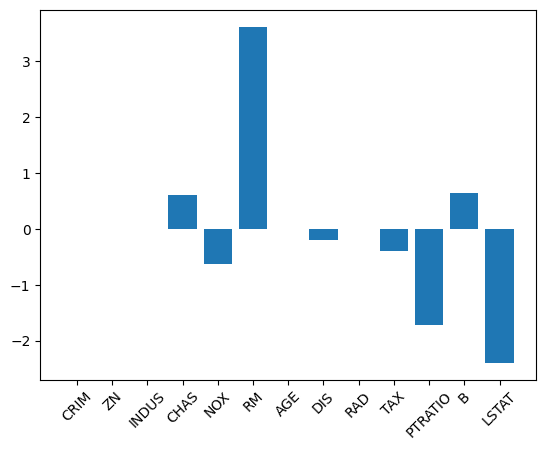

In [ ]:
lasso = Lasso(alpha = 0.44)
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

plt.bar(df.columns.drop('MEDV'), lasso_coef)
plt.xticks(rotation=45)
plt.show()



Now we see even better feature selection and extraction because most of the features that are close to zero can be dropped because the Lasso tells us that they are not important. Now let's fit Lasso to the entire data

[-0.07811823  0.0564804  -0.01032963  0.         -0.          3.05863836
 -0.00857984 -0.97738459  0.24677189 -0.01551692 -0.73960154  0.01003942
 -0.54067927]


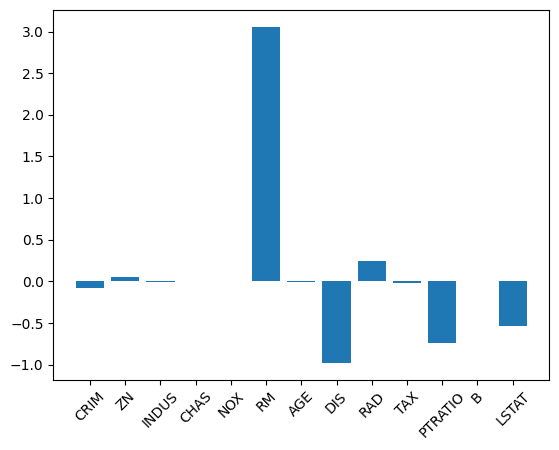

In [ ]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.44)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

plt.bar(df.columns.drop('MEDV'), lasso_coef)
plt.xticks(rotation=45)
plt.show()

REFERENCES:

1.) Lari Giba, Lasso Regression Explained, Step by Step, https://machinelearningcompass.com/machine_learning_models/lasso_regression/

2.) Tibshirani, Robert (1996). "Regression Shrinkage and Selection via the lasso". Journal of the Royal Statistical Society. Series B (methodological). Wiley. 58 (1): 267–88. JSTOR 2346178

3.) Jim Frost, Mean Squared Error (MSE), Statistics By Jim, https://statisticsbyjim.com/regression/mean-squared-error-mse/

4.) Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani; An Introduction to Statistical Learning; Springer

5.) Tahera Firdose, Lasso Regression: A Comprehensive Guide to Feature Selection and Regularization, Medium

6.) Lasso documentation in sklearn.linear_model.Lasso

7.) Boston housing data:
https://www.kaggle.com/datasets/altavish/boston-housing-dataset

or:

http://lib.stat.cmu.edu/datasets/boston




● Journal:

“Lasso Regressions and Forecasting Models in Applied Stress Testing”
by Jorge A. Chan-Lau, published by the International Monetary Fund.

● Keywords:

LASSO, Regression, Regularization, Feature Selection, High-Dimensional Data,
Overfitting, Model Selection, Machine Learning, Finance, Stress Testing


# **Clustering**

*   Clustering:

    It’s a method of unsupervised learning which organizes the data points into a number of groups based on the similarities in attributes of data points. K-means clustering is an example of clustering which is based on centroid-based algorithms or distance-based algorithms and the number of clusters are already defined or fixed.

*   Advantages:

    •	It’s very easy to implement and understand.

    •	It can be easily adapted to new examples.

    •	Re-computation of centroid is an advantage for K-means clustering.



*  Computation:
A Jupyter notebook that illustrates the method below:

In [ ]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

np.random.seed(0)

%matplotlib inline

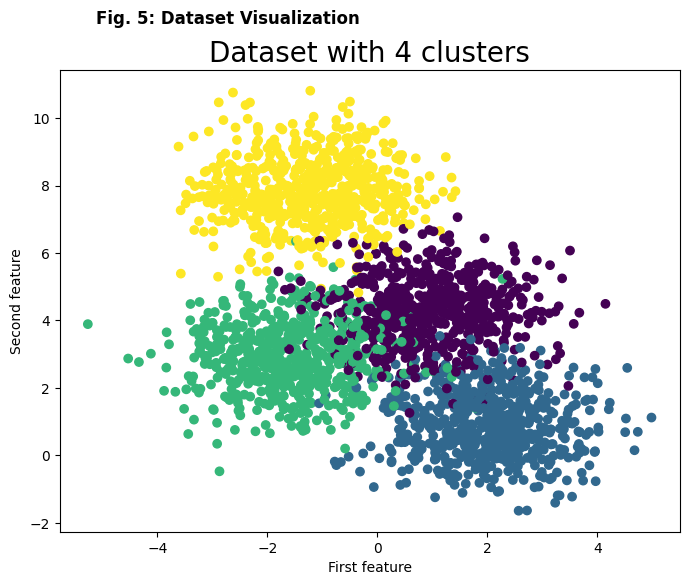

In [ ]:
X, y = make_blobs(centers=4, n_samples=2500)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with 4 clusters", fontsize=20)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.suptitle(
    "Fig. 5: Dataset Visualization", fontweight="bold", horizontalalignment="right"
)
plt.show()

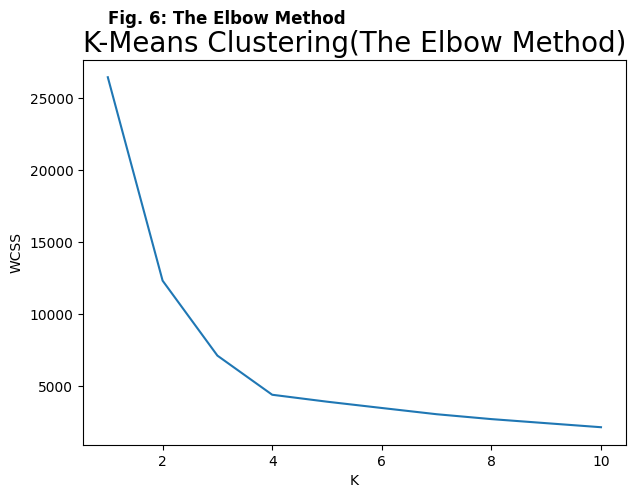

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title("K-Means Clustering(The Elbow Method)", fontsize=20)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.suptitle("Fig. 6: The Elbow Method", fontweight="bold", horizontalalignment="right")
plt.show()

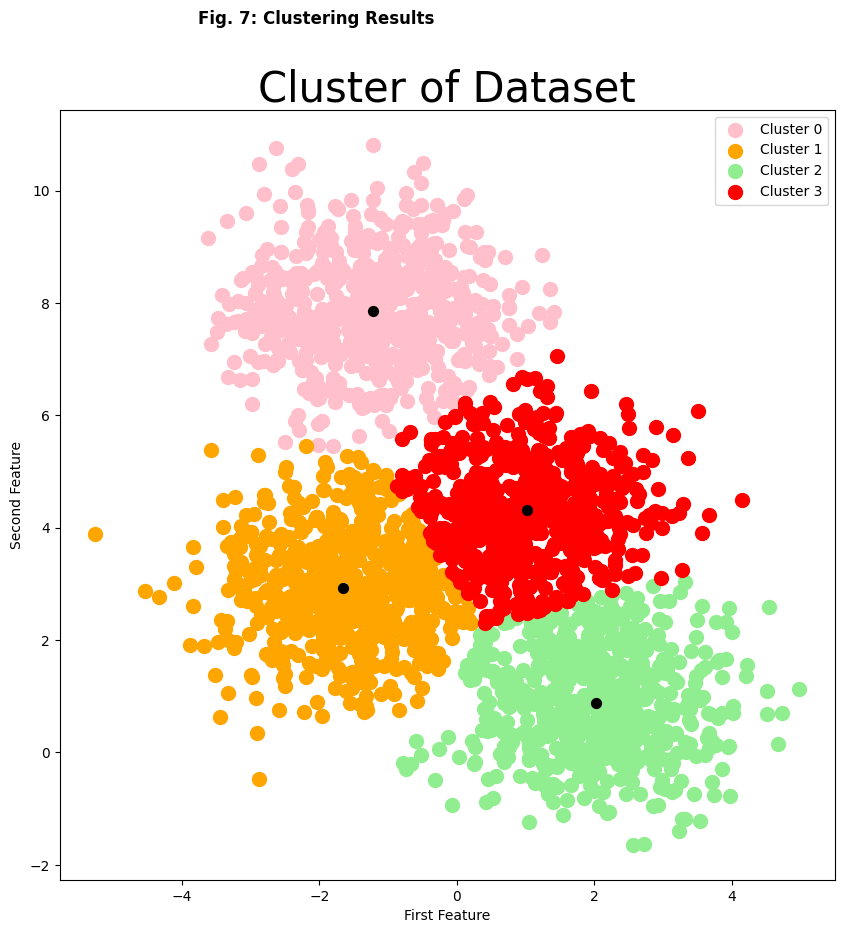

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
ymeans = kmeans.fit_predict(X)

plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Cluster of Dataset", fontsize=30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s=100, c="pink", label="Cluster 0")
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s=100, c="orange", label="Cluster 1")
plt.scatter(
    X[ymeans == 2, 0], X[ymeans == 2, 1], s=100, c="lightgreen", label="Cluster 2"
)
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s=100, c="red", label="Cluster 3")
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c="black"
)

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend()
# `plt.suptitle`('Fig 10: Clustering Results', fontsize=20, y = 1, ha = 'right')
plt.suptitle(
    "Fig. 7: Clustering Results", fontweight="bold", horizontalalignment="right"
)
plt.show()



*   Disadvantages:

    •	Selection of number of clusters before modelling and output is strongly impacted by this number.

    •	K-means only works with linear cluster boundaries.

    •	It’s very sensitive to rescaling which means if we normalize or standardize our data then the output might be completely changed.
    
    •	It doesn’t work good for big data and if clusters are having complex geometrical shape.



*  Equations:
Equations that summarize how the model works


    Step 1:
      Selecting K centroids where K is the number of clusters. Let 𝑋={𝑥1,𝑥2,⋯,𝑥𝑛} be our data points and 𝑉={𝑣1,𝑣2,⋯,𝑣𝑐} be the centroids.


    Step 2:
      Select centroids randomly and calculate the distance between centroids and each data point.


    Step 3:
      Then assign the data points to the centroids closest to them. And after that recalculate the new centroids by computing the mean of the grouping.

      𝑣𝑖=(1/𝑐𝑖)∑𝑗=1𝑐𝑖𝑥𝑗
      where 𝑐𝑖 is the number of data points in the ith cluster.


    Step 4:
      Find the distance between the new centroid and each data point. If there is no change in the composition of the clusters then we stop, or else we repeat the procedure from step 2.


      Mathematically, the objective of the K-means algorithm is to minimize an objective function which in our case is a squared error function given by
      𝐽=∑𝑗=1𝑘∑𝑖=1𝑛||𝑥𝑗𝑖−𝐶𝑗||2

      where
      ||𝑥𝑗𝑖−𝐶𝑗||2||
      is the Euclidean distance between data points 𝑥𝑖 and the centroid 𝐶𝑗



*   Features: Features of the model (e.g., works well with missing values)

    •	It works well with various types of attributes

    •	It can deal with noise and outliers

    •	It can handle high dimensionality



*   Guide:

    Inputs- Dataset as a collection of data points of different attributes.
    
    Output- Assignment of each data point to one of the K clusters and then gives the value of centroid of clusters.



*   Hyperparameters:

    The number of clusters- this is fixed before modelling, and it can be decided with the help of different methods like Silhouette analysis or elbow method.
    
    Number of Iterations- It determines how many times the assignment or steps followed in algorithm to be done and it helps the algorithm time.



*   Illustration:

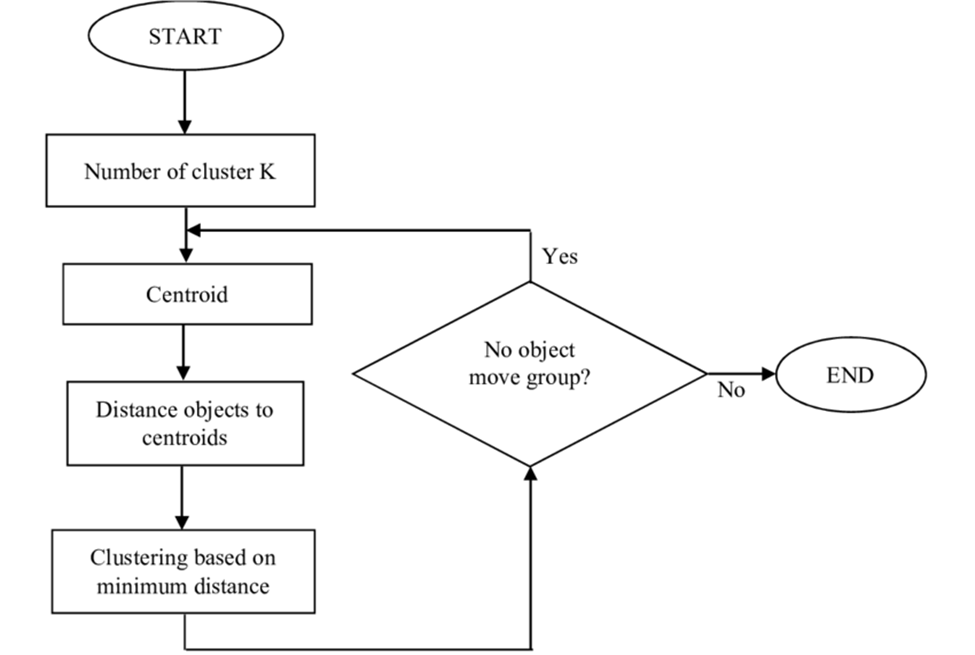



*   Journal:

    1.	Article by Priya Pedamkar - https://www.educba.com/k-means-clustering-algorithm/
    
    2.	Combination of K-means clustering with Genetic Algorithm: A review by Diyar Qader Zeebaree, Habibollah Haron, Adnan Mohsin Abdulazeez and Subhi R. M. Zeebaree.  Available at- International Journal of Applied Engineering Research ISSN 0973-4562 Volume 12, Number 24 (2017) pp. 14238-14245 https://www.academia.edu/download/55576223/Combination_of_K-means_clustering_with_Genetic_Algorithm_A_review.pdf



*   Keywords:

    Clusters, K-means algorithm, Centroids, Centroid-based algorithms, Distance metrics, Euclidean distance, Elbow method, Silhouette analysis, Random initialization, Noise, Outliers, Attributes, Dimensions, Dimensionality, Normalization, Standardization, Scalability, Data analysis, Dataset, Data points, optimization

### **Step 3: Technical Section**




#### **Tuning K-Means Hyperparameter**:

Tuning in K-means clustering is done with the finding of K value that is the number of optimal clusters. There is no direct method to find the optimal value of K so we do the tuning with the help of various methods. Here, we did the tuning or find the optimal value of K by using Silhouette analysis and Elbow method which help us to find the optimal value of K. In this given project we got the optimal value of K as 4.


#### **Support Vector Machines (SVM) with Principal Component Analysis (PCA)**

1. SVM Hyperparameters:

- C (Regularization parameter): The C parameter trades off correct classification of training examples against maximization of the decision function's margin. We compare the list of Regularization parameters: [1, 10, 100, 1000]. By Grid Search, we find 100 as the optimal regularization parameter.

- Kernel Parameters: from the example below, we use a kernel (e.g., radial basis function - RBF), thus we need to tune kernel-specific parameters (e.g. gamma). We compare the list of Kernel parameters: [0.001, 0.0001]. By Grid Search, we find 0.001 as the optimal kernel parameter.

- Kernel Choice: there are various choices, such as linear, polynomial, and RBF. We compare the list of Kernel methods: ['linear', 'rbf']. By Grid Search, we find RBF as the optimal kernel choice.

2. PCA Hyperparameters:
- Number of Components:  we can observe from the plot of cumulative explained variance and by Grid Search in the list of number of components ([10, 20, 30, 40, 50, 60, 64]), we decide 40 as the optimal number of components.

By Grid search, we have the optimal hyperparameter:  

 {'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}

Furthermore, with the optimal hyperparameters above, we have performance metrics, such as precision, recall, and F1-score, which are at 97% on average. In addition, further advanced techniques are Bayesian Optimization and Ensemble Methods.

In [ ]:
 # {'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
classifier = svm.SVC()
# Combine PCA and SVC to a pipeline
pipe = Pipeline(steps=[('pca', pca), ('svm', classifier)])

n_components = [10, 20, 30, 40, 50, 60, 64]

params_grid = {
    'svm__C': [1, 10, 100, 1000],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.0001],
    'pca__n_components': n_components,
}

estimator = GridSearchCV(pipe, params_grid)
estimator.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % estimator.best_score_)
print(estimator.best_params_)

Best parameter (CV score=0.973):
{'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


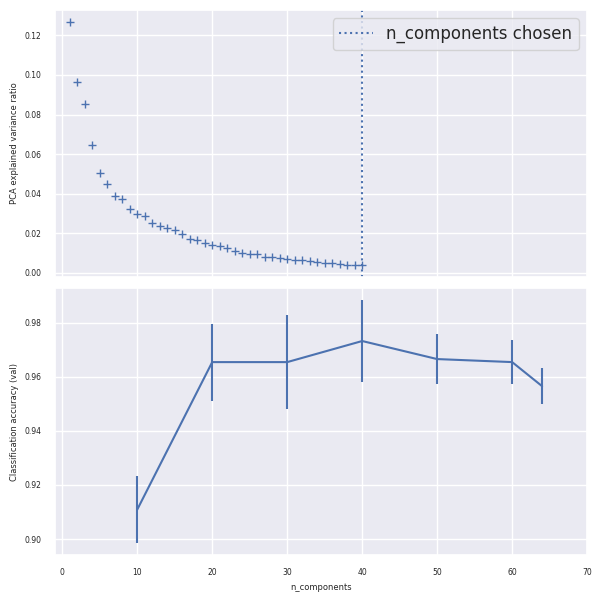

In [ ]:
# Plot the PCA
pca.fit(x_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    estimator.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(estimator.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.95      0.98      0.96        90
           2       0.96      1.00      0.98        92
           3       0.96      0.98      0.97        93
           4       0.95      1.00      0.97        76
           5       0.96      0.96      0.96       108
           6       0.99      0.98      0.98        89
           7       0.97      0.99      0.98        78
           8       0.98      0.86      0.91        92
           9       0.96      0.93      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  88   0   0   1   0   0   0   1   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   2  91   0   0   0  

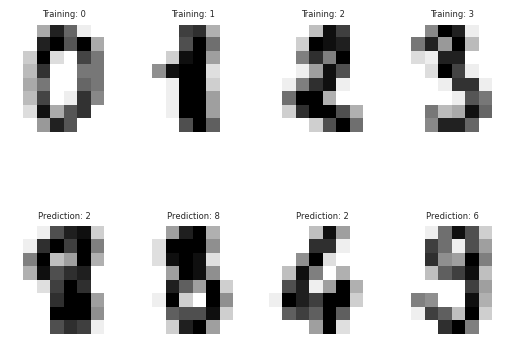

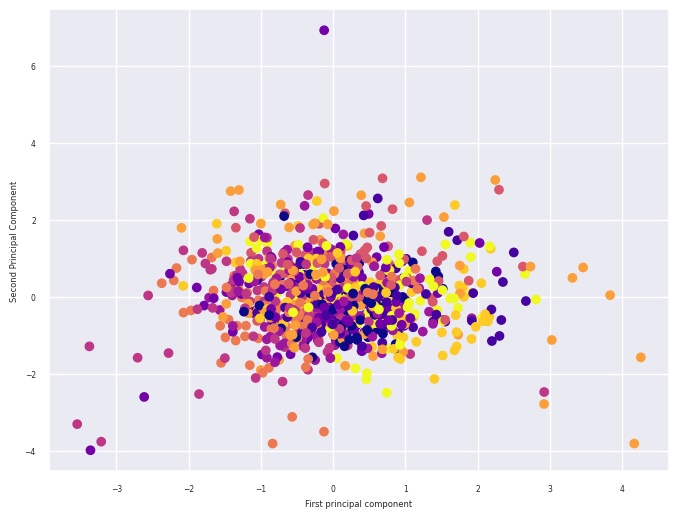

In [ ]:
# The digits dataset
digits = datasets.load_digits()
X, y = load_digits(return_X_y=True)

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will show the four images for the training set and another four images for prediction
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
# We get the optimal number from GridSearch:
 # {'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
pca = PCA(n_components=40)
scaler = StandardScaler()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


classifier = SVC(C= 100, gamma=0.001, kernel = 'rbf')


# We learn the digits on the training set
#classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])
classifier.fit(x_train, y_train)

# Now predict the value of the digit on test set:
#expected = digits.target[int(n_samples / 2):]
#predicted = classifier.predict(data[int(n_samples / 2):])
expected = y_test
predicted = classifier.predict(x_test)#

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.show()

### **Step 4: Marketing Alpha**

As a group, the team members work together on a section called “Marketing Alpha,”
which integrates the advantages and features from the individual reports to show how
ML techniques can do well. The result is 1–2 pages.





#### **K-Means Clustering**


  K-Means Clustering method is less computationally intensive and hence it’s suitable for very large datasets. Once we have the optimal number of clusters defined then the result of K-means clustering is relevant as we see in the above example where we defined the number of clusters as four and hence, we get all the data points perfectly fit into these clusters. However, if we run the algorithms many times, we will have different results in this method. Also, it’s not good for the data points having similar attributes as all of them move into the same cluster and hence defining the structure of data points will be difficult using this method.

#### **Principal components**

● Advantages:

Dimensionality Reduction: PCA reduces the number of features, simplifying the dataset.

Noise Reduction: It helps in filtering out noise and focusing on the most important features.

Visual Representation: Data can be visualized in a reduced-dimensional space, aiding interpretation.

● Features:

Missing Values: PCA handles missing values well, making it suitable for datasets with incomplete information.

Multicollinearity: It is effective in dealing with multicollinearity, as principal components are orthogonal.

Original Dataset:  (1797, 64)
Training Dataset:  (898, 64)


<Axes: >

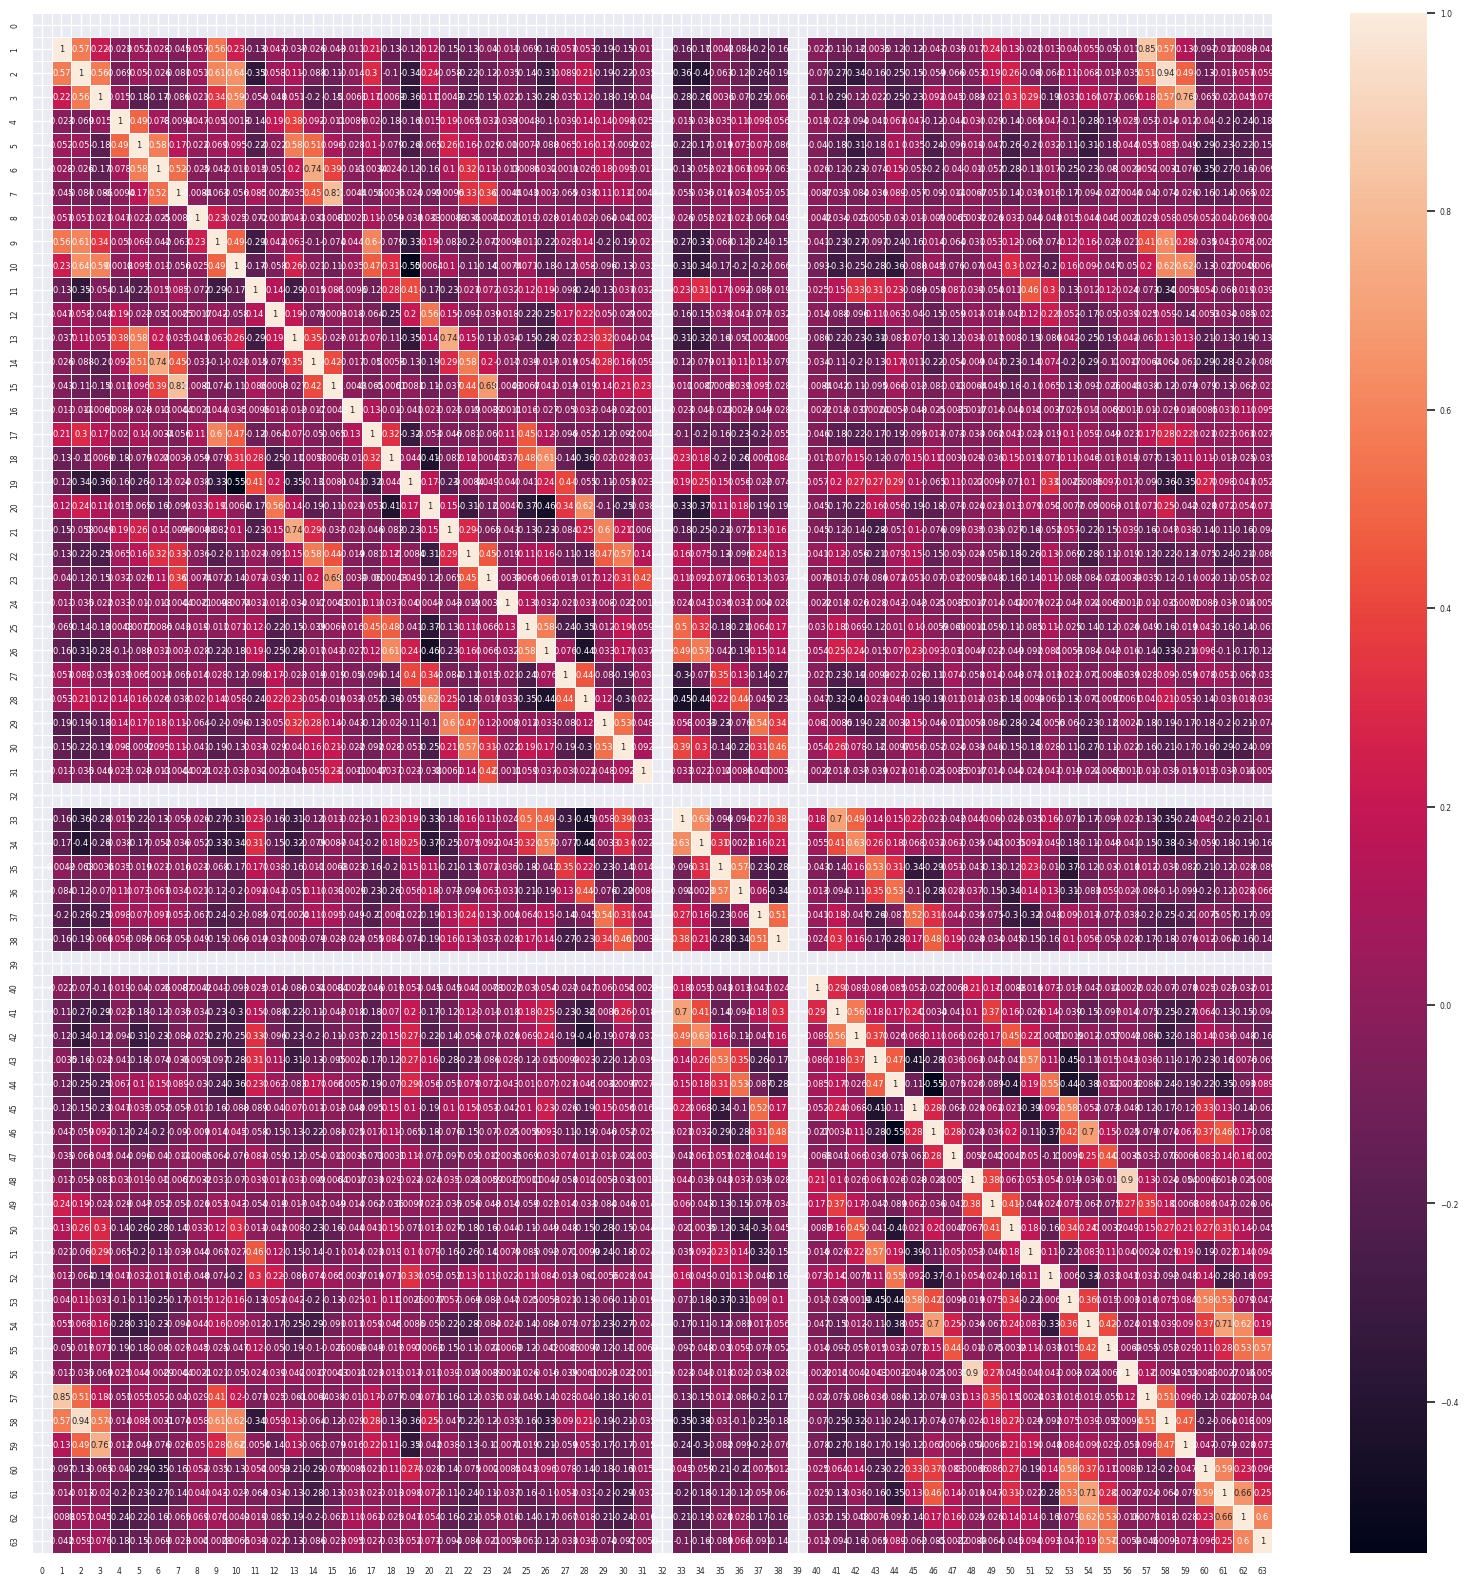

In [ ]:
# correlation matrix before PCA: we can observe highly correlated between variables
# Load dataset
X, y = load_digits(return_X_y=True)

print("Original Dataset: ", X.shape)

# normaliztion
scaler = StandardScaler()

X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.5, random_state=0)

print("Training Dataset: ",x_train.shape)
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.5)

sns.heatmap(pd.DataFrame(x_train).corr(), annot = True, linewidths=.5, ax=ax)

<Axes: >

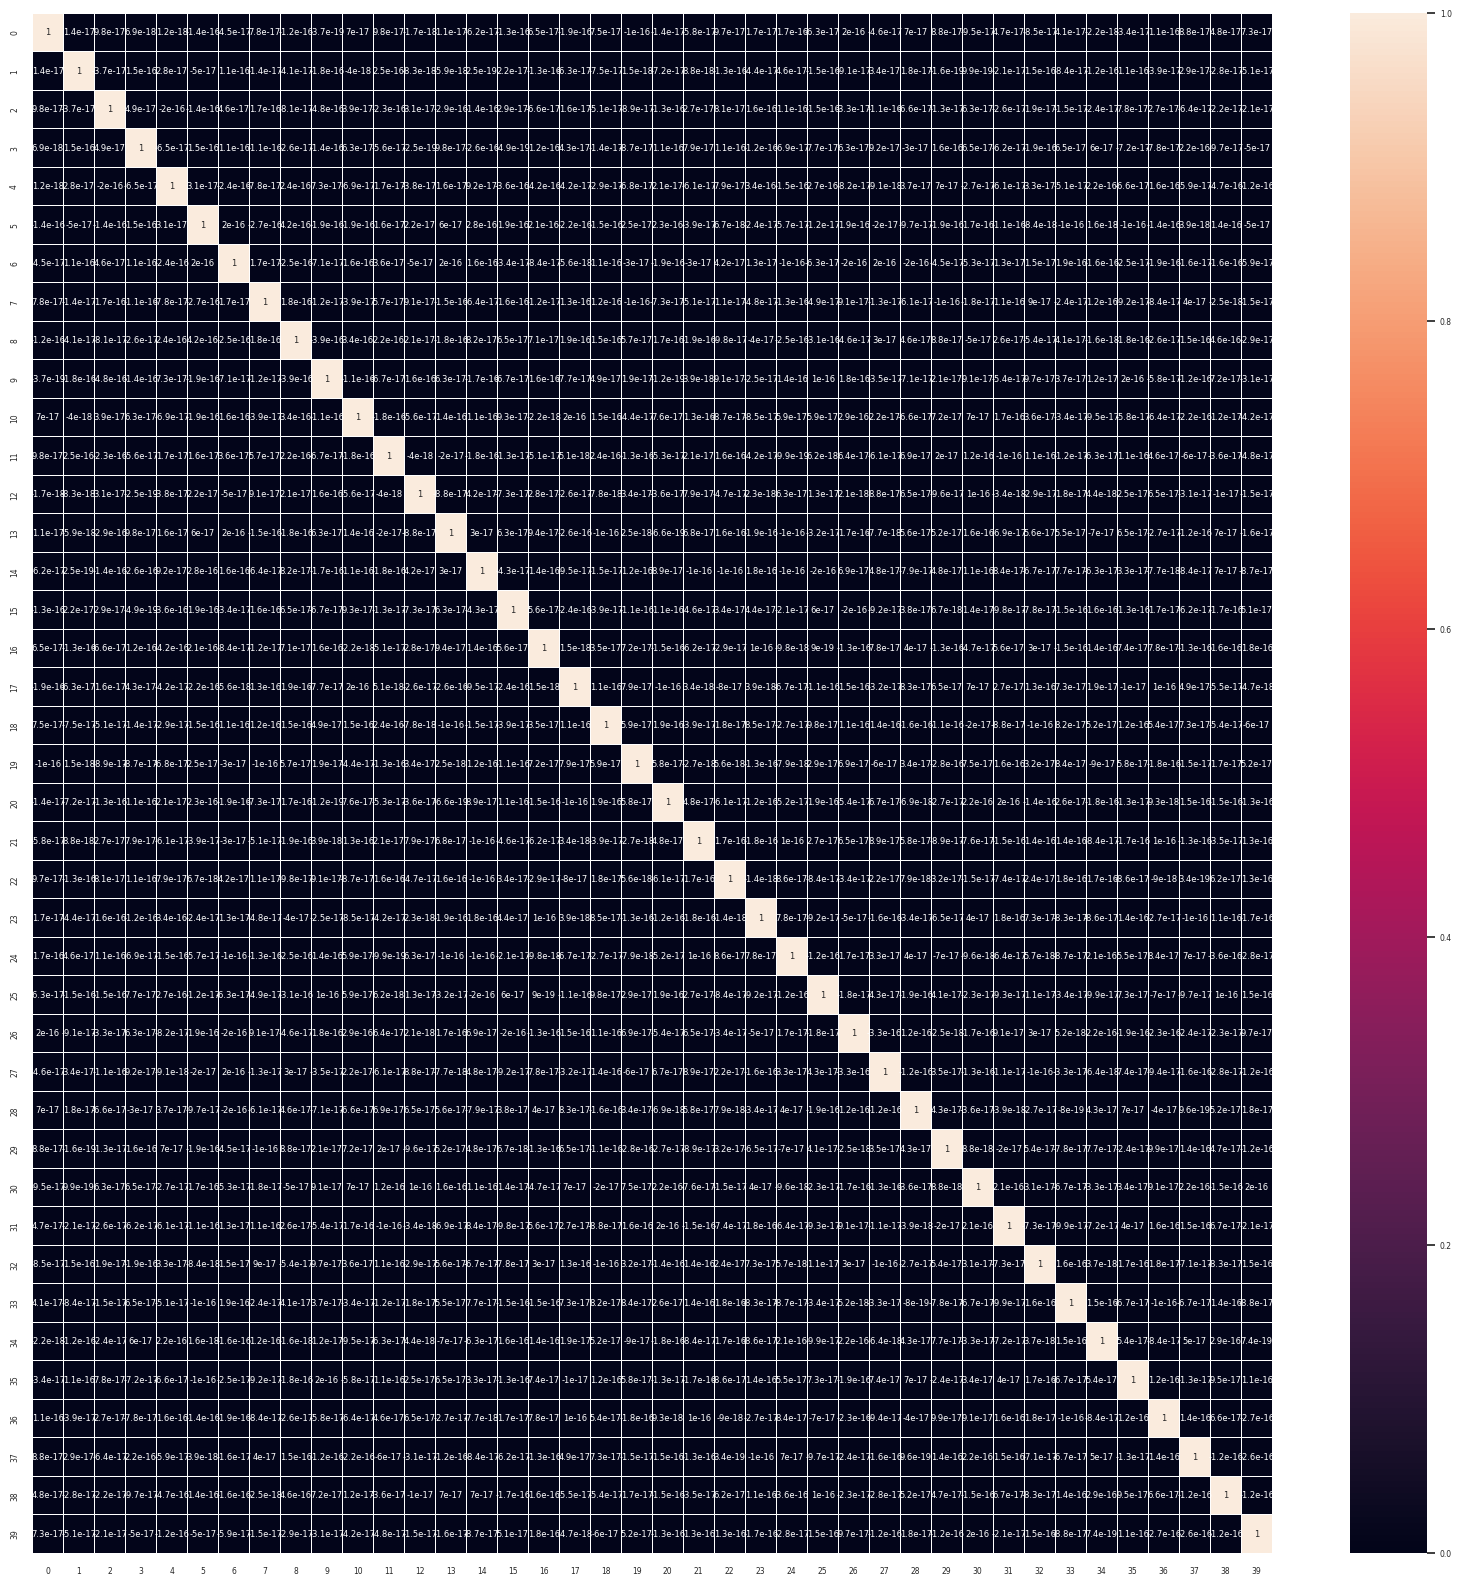

In [ ]:
# correlation matrix after PCA: we can observe highly correlated variables have been removed.

pca = PCA(n_components=40)

# Conducting PCA
X_pca = pca.fit_transform(x_train)

fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.5)

sns.heatmap(pd.DataFrame(X_pca).corr(), annot = True, linewidths=.5, ax=ax)

### **Step 5: Learn More**

Tibshirani, Robert (1996). "Regression Shrinkage and Selection via the lasso". Journal of the Royal Statistical Society. Series B (methodological). Wiley. 58 (1): 267–88. JSTOR 2346178

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani; An Introduction to Statistical Learning; Springer

Tahera Firdose, Lasso Regression: A Comprehensive Guide to Feature Selection and Regularization, Medium

Jorge A. Chan-Lau, Lasso Regressions and Forecasting Models in Applied Stress Testing,  International Monetary Fund

Lasso documentation in sklearn.linear_model.Lasso

KP Sinaga, MS Yang: Unsupervised K-means clustering algorithm; IEEE access, 2020

M Yedla, SR Pathakota, TM Srinivasa: Enhancing K-means Clustering Algorithm with Improved Initial Center ; International Journal of computer science and Information Technology, 2010

Pooya Tavallali, Peyman Tavallali & Mukesh Singhal : K-Means tree: an optimal clustering tree for unsupervised learning; The Journal of Supercomputing; Springer

Avellaneda, Marco and Lee, Jeong-Hyun, Statistical Arbitrage in the U.S. Equities Market (July 11, 2008). Available at SSRN: https://ssrn.com/abstract=1153505 or http://dx.doi.org/10.2139/ssrn.1153505
